## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [ ]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [ ]:
import pandas as pd
# Lets load our file into the dataframe for our code to read
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
euk = pd.read_csv(tsvFile, sep="\t")
# Now, we put in our filter and we need class Mammals and Names of Species.
# Convert the 'Number of genes' column to numeric, forcing errors to NaN
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors='coerce')

# Filter out rows where 'Number of genes' is not there
euk = euk.dropna(subset=['Number of genes'])

mammals = euk[(euk['Class'] == 'Mammals') & (euk['Number of genes'] >= 20000)]

mammal_species = mammals['Species']
print(f"Number of mammals with at least 20,000 genes: {mammals.shape[0]}")
print(f"Scientific names: {mammal_species.tolist()}")


Number of mammals with at least 20,000 genes: 134
Scientific names: ['Homo sapiens', 'Mus musculus', 'Rattus norvegicus', 'Felis catus', 'Bos taurus', 'Ovis aries', 'Canis lupus familiaris', 'Sus scrofa', 'Ornithorhynchus anatinus', 'Equus caballus', 'Pan troglodytes', 'Macaca mulatta', 'Monodelphis domestica', 'Loxodonta africana', 'Sorex araneus', 'Erinaceus europaeus', 'Cavia porcellus', 'Echinops telfairi', 'Dasypus novemcinctus', 'Oryctolagus cuniculus', 'Pongo abelii', 'Canis lupus dingo', 'Papio anubis', 'Callithrix jacchus', 'Otolemur garnettii', 'Ictidomys tridecemlineatus', 'Nomascus leucogenys', 'Myotis lucifugus', 'Pteropus vampyrus', 'Tursiops truncatus', 'Microcebus murinus', 'Dipodomys ordii', 'Macaca fascicularis', 'Ochotona princeps', 'Bubalus bubalis', 'Galeopterus variegatus', 'Vicugna pacos', 'Gorilla gorilla gorilla', 'Ailuropoda melanoleuca', 'Cricetulus griseus', 'Sarcophilus harrisii', 'Mustela putorius furo', 'Bos indicus', 'Odocoileus virginianus texanus', 'Sa

### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [ ]:
# Let us filter the kingdom by the class animal
Animals = euk[euk['Kingdom'] == 'Animals']
#Lets count the number of records for each class of the kingdom animal
class_count = Animals['Class'].value_counts()
print(class_count)

Class
Insects          155
Mammals          137
Birds             82
Fishes            72
Roundworms        63
Other Animals     63
Flatworms         21
Reptiles          16
Amphibians         4
Name: count, dtype: int64


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [ ]:
# Let us filter the kingdom by the class animal
Animals = euk[euk['Kingdom'] == 'Animals']
#Lets count the unique species for each Class of animals
unique_count = Animals.groupby('Class')['Species'].nunique()

print(unique_count)

Class
Amphibians         4
Birds             80
Fishes            69
Flatworms         19
Insects          142
Mammals          127
Other Animals     61
Reptiles          16
Roundworms        49
Name: Species, dtype: int64


::### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [11]:
mammals = euk[euk['Class'] == 'Mammals']
macaca_species = mammals[mammals['Species'].str.startswith('Macaca')]['Species'].unique()

print(f"Unique scientific names of Mammals with the genus Macaca: {macaca_species}")


Unique scientific names of Mammals with the genus Macaca: ['Macaca mulatta' 'Macaca fascicularis' 'Macaca nemestrina']


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [13]:
# Split the 'Species' names by spaces and take the first two parts
euk['Modified Species'] = euk['Species'].str.split().str[0:2].str.join(" ")
# Using q3 from lecture
# Select the relevant columns and create the new dataframe
df_species = euk[['Kingdom', 'Class', 'Modified Species', 'Size (Mb)', 'Number of genes', 'Number of proteins']]

# Print the new dataframe
print(df_species.head())


    Kingdom           Class      Modified Species  Size (Mb)  Number of genes  \
0  Protists  Other Protists     Emiliania huxleyi    167.676          38549.0   
1    Plants     Land Plants  Arabidopsis thaliana    119.669          38311.0   
2    Plants     Land Plants           Glycine max    979.046          59847.0   
3    Plants     Land Plants   Medicago truncatula    412.924          37603.0   
4    Plants     Land Plants  Solanum lycopersicum    828.349          31200.0   

  Number of proteins  
0              38554  
1              48265  
2              71219  
3              41939  
4              37660  


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [14]:
import pandas as pd

# Provided DataFrame form quesiton 5
euk = pd.DataFrame({
    'Kingdom': ['Protists', 'Plants', 'Plants', 'Plants', 'Plants'],
    'Class': ['Other Protists', 'Land Plants', 'Land Plants', 'Land Plants', 'Land Plants'],
    'Modified Species': ['Emiliania huxleyi', 'Arabidopsis thaliana', 'Glycine max', 'Medicago truncatula', 'Solanum lycopersicum'],
    'Size (Mb)': [167.676, 119.669, 979.046, 412.924, 828.349],
    'Number of genes': [38549.0, 38311.0, 59847.0, 37603.0, 31200.0],
    'Number of proteins': [38554, 48265, 71219, 41939, 37660]
})

# Calculate the number of unique species per class
unique_species_count = euk.groupby('Class')['Modified Species'].nunique()

# Create a new DataFrame with the index as the 'Class' and the count of unique species as the data
df_unique_species = pd.DataFrame({'Unique Species': unique_species_count})

# Print the new data
print(df_unique_species)


                Unique Species
Class                         
Land Plants                  4
Other Protists               1


<Figure size 800x800 with 0 Axes>

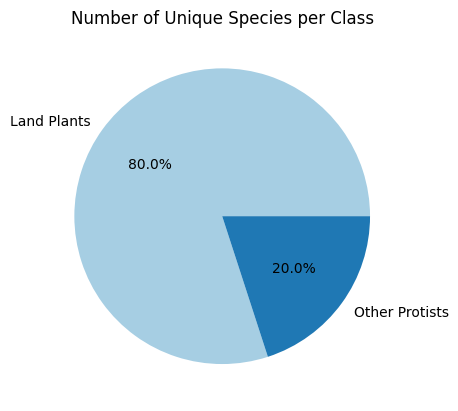

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Provided DataFrame from earlier code
euk = pd.DataFrame({
    'Kingdom': ['Protists', 'Plants', 'Plants', 'Plants', 'Plants'],
    'Class': ['Other Protists', 'Land Plants', 'Land Plants', 'Land Plants', 'Land Plants'],
    'Modified Species': ['Emiliania huxleyi', 'Arabidopsis thaliana', 'Glycine max', 'Medicago truncatula', 'Solanum lycopersicum'],
    'Size (Mb)': [167.676, 119.669, 979.046, 412.924, 828.349],
    'Number of genes': [38549.0, 38311.0, 59847.0, 37603.0, 31200.0],
    'Number of proteins': [38554, 48265, 71219, 41939, 37660]
})

# Calculate the number of unique species per class
unique_species_count = euk.groupby('Class')['Modified Species'].nunique()

df_unique_species = pd.DataFrame({'Unique Species': unique_species_count})

# Plot the pie chart
plt.figure(figsize=(8, 8))
df_unique_species.plot.pie(y='Unique Species', legend=False, autopct='%1.1f%%', title='Number of Unique Species per Class', colors=plt.cm.Paired(range(len(df_unique_species))))
plt.ylabel('')  # Hide the y-label as it's not needed for pie chart (stack overflow)
plt.show()
